In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [12]:
trData = pd.read_csv("../data/train_final.csv", header = None,names=['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','y'],skiprows=1)
teData = pd.read_csv("../data/removeID_test_final.csv", header = None,names=['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14'],skiprows=1)

In [43]:
def oneHot(data):
    data=data.drop(columns=['x14'])
    dataOneHot=pd.get_dummies(data=data,columns=['x2','x4','x5','x6','x7','x8','x9','x10'])#,'x14'
    return dataOneHot
    
X_train= trData.iloc[:,0:trData.shape[1]-1]
# X_test=teData
y_train= trData.iloc[:,-1]
# y_train= np.array(y_train)[:,None].astype(np.float32)
# y_train[y_train==0]=-1
data=pd.concat([X_train,teData],ignore_index=True)
data=oneHot(data)
# X_train=np.array(data.iloc[0:25000,:].values).astype(np.float32)
# X_test=np.array(data.iloc[25000:48842,:].values).astype(np.float32)
X_train=data.iloc[0:25000,:]
X_train_xy=pd.concat([X_train,y_train],axis=1)

In [44]:
X_train_xy

,x1,x3,x11,x12,x13,x2_?,x2_Federal-gov,x2_Local-gov,x2_Never-worked,x2_Private,...,x8_Unmarried,x8_Wife,x9_Amer-Indian-Eskimo,x9_Asian-Pac-Islander,x9_Black,x9_Other,x9_White,x10_Female,x10_Male,y
0,53,93449,0,0,40,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
1,33,123424,0,0,40,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
2,47,144844,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
3,40,114580,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
4,39,115618,0,0,50,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,18,83451,0,0,25,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
24996,64,202738,0,0,35,0,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
24997,39,225544,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
24998,53,346871,4787,0,46,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,1


In [9]:
trData.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,y
0,53,Self-emp-not-inc,93449,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,1
1,33,Self-emp-not-inc,123424,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
2,47,Private,144844,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
3,40,Private,114580,HS-grad,9,Divorced,Craft-repair,Other-relative,White,Female,0,0,40,Vietnam,0
4,39,Private,115618,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,50,United-States,0


In [10]:
teData.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14
0,33,Self-emp-not-inc,222162,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States
1,68,?,29240,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,0,12,United-States
2,34,Private,103596,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States
3,57,Private,103403,5th-6th,3,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States
4,48,Private,152915,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States


In [32]:
# teData.isnull().sum() #checking for missing values and no.
#to specify all categorical features
seed=600
X_train= trData.iloc[0:seed+1,0:trData.shape[1]-1]
y_train= trData.iloc[seed:trData.shape[0],-1]
y_train=np.array(y_train)
y_train.shape
# pd.concat([X_train,y_train],axis="columns")

# y_train[y_train==0]=-1
# np.sum(y_train==1)
# X_train["x2"].astype("category") 
# X_train["x4"].astype("category") 
# X_train["x6"].astype("category") 
# X_train["x7"].astype("category") 
# X_train["x8"].astype("category") 
# X_train["x9"].astype("category") 
# X_train["x10"].astype("category") 
# X_train["x14"].astype("category") 
# teData["x2"].astype("category") 
# trData["x4"].astype("category") 
# teData["x6"].astype("category") 
# teData["x7"].astype("category") 
# teData["x8"].astype("category") 
# teData["x9"].astype("category") 
# teData["x10"].astype("category") 
# teData["x14"].astype("category") 

(24400,)

In [9]:
6016/18984

0.3168984407922461

In [19]:
pos =trData[trData['y']==1]
# neg =trData[trData['y']==0]
# pos = trData[mask]
# neg = trData[~mask]
# print(pos)
print(pos.iloc[0:pos.shape[0],:])
# print(neg)

       x1                x2      x3            x4  x5                  x6  \
0      53  Self-emp-not-inc   93449   Prof-school  15  Married-civ-spouse   
1      33  Self-emp-not-inc  123424     Bachelors  13  Married-civ-spouse   
6      55           Private   50164     Doctorate  16  Married-civ-spouse   
11     37       Federal-gov   32528       HS-grad   9  Married-civ-spouse   
18     56      Self-emp-inc  321529  Some-college  10  Married-civ-spouse   
...    ..               ...     ...           ...  ..                 ...   
24986  38                 ?   48976       HS-grad   9  Married-civ-spouse   
24988  29           Private  280344     Bachelors  13  Married-civ-spouse   
24990  48      Self-emp-inc  136878       HS-grad   9  Married-civ-spouse   
24992  49           Private  144844       HS-grad   9  Married-civ-spouse   
24998  53           Private  346871       HS-grad   9            Divorced   

                     x7             x8                  x9     x10    x11  

In [ ]:

clf=xgb.XGBClassifier(tree_method="gpu_hist",enable_categorical=True)
#supported tree method are "gpu_hist",'approx", and "hist"

clf.fit(X_train, y_train)
clf.save_model("categorical-model.json")

In [ ]:
# ft=['q','c','q','c','q','c','c','c','c','c','q','q','q','c']
# X: np.ndarray=X_train
# assert X.shape[1]==14
# Xy=xgb.DMatrix(X_train,y_train,feature_types=ft,enable_categorical=True)

In [26]:
def oneHot(data):
    data=data.drop(columns=['x14'])
    dataOneHot=pd.get_dummies(data=data,columns=['x2','x4','x5','x6','x7','x8','x9','x10'])#,'x14'
    return dataOneHot

In [27]:
X_train= trData.iloc[:,0:trData.shape[1]-1]
y_train= trData.iloc[:,-1]
y_train= np.array(y_train)[:,None].astype(np.float32)
y_train[y_train==0]=-1
data=pd.concat([X_train,teData],ignore_index=True)
data=oneHot(data)
X_train=np.array(data.iloc[0:25000,:].values).astype(np.float32)
X_test=np.array(data.iloc[25000:48842,:].values).astype(np.float32)
print(X_test.shape,X_train.shape)
# data_dmatrix = xgb.DMatrix(data=X_train,label=y_train,enable_categorical=True)

(23842, 81) (25000, 81)


In [29]:
# data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state = 0)

In [49]:
from xgboost import XGBClassifier
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }
xgb_clf = XGBClassifier(**params)
xgb_clf.fit(X_train, y_train)

[01:02:57] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=1.0, max_delta_step=0,
              max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [54]:
y_val_pre = xgb_clf.predict(X_val)
y_train_pre=xgb_clf.predict(X_train)

In [55]:
from sklearn.metrics import accuracy_score
print({'XGBoost validation accuracy score: {0:0.4f}'. format(accuracy_score(y_val, y_val_pre)),'XGBoost training accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_train_pre))})

{'XGBoost validation accuracy score: 0.8650', 'XGBoost training accuracy score: 0.8878'}


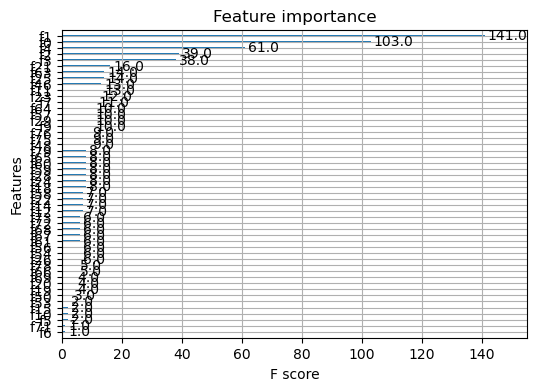

In [52]:
xgb.plot_importance(xgb_clf)
plt.rcParams['figure.figsize'] = [6, 4]
plt.show()

In [70]:
xgb_clf.feature_importances_

array([0.01306321, 0.001846  , 0.06958279, 0.02462003, 0.00943802,
       0.00058378, 0.00806007, 0.00174572, 0.        , 0.00178211,
       0.00064168, 0.00682672, 0.00196901, 0.        , 0.00161492,
       0.01228517, 0.        , 0.        , 0.00058246, 0.00598081,
       0.00082565, 0.00113555, 0.00128245, 0.02160293, 0.01197696,
       0.00602331, 0.04650654, 0.        , 0.01570957, 0.0025655 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00183813, 0.        , 0.5477855 , 0.        ,
       0.00058065, 0.        , 0.        , 0.0005512 , 0.00386767,
       0.        , 0.00232526, 0.05505416, 0.00390266, 0.00099381,
       0.00111263, 0.00753865, 0.        , 0.03908498, 0.0044251 ,
       0.01010626, 0.01007034, 0.00087555, 0.00178615, 0.00319497,
       0.        , 0.02387418, 0.00089091, 0.00640259, 0.     

In [53]:
y_test = xgb_clf.predict(X_test)
Output = pd.DataFrame({"ID":np.arange(len(y_test))+1,'Prediction': y_test})
Output.to_csv("XGB.csv", index=False) 



{'XGBoost validation accuracy score: 0.8455', 'XGBoost training accuracy score: 0.9998'} depth=15,lr=1,alpha=1,n=100//overfitting
{'XGBoost training accuracy score: 0.9995', 'XGBoost validation accuracy score: 0.8493'}depth=10,lr=1,alpha=1,n=100//overfitting
{'XGBoost validation accuracy score: 0.8521', 'XGBoost training accuracy score: 0.9448'}depth=5,lr=1,alpha=1,n=100//overfitting
{'XGBoost training accuracy score: 0.9772', 'XGBoost validation accuracy score: 0.8525'}depth=5,lr=1,alpha=1,n=200//overfitting
{'XGBoost training accuracy score: 0.9138', 'XGBoost validation accuracy score: 0.8693'}depth=10,lr=0.1,alpha=1,n=100//overfitting